In [578]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [579]:
df = pd.read_csv('Global_YouTube_Statistics.csv', encoding='latin-1')
df

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country of origin,Country,Abbreviation,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000.0,2.280000e+11,Music,T-Series,20082,India,india,IN,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000.0,0.000000e+00,Film & Animation,youtubemovies,1,United States,United States,US,...,NaN,2006.0,NaN,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000.0,2.836884e+10,Entertainment,MrBeast,741,United States,United States,US,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000.0,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,United States,US,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000.0,1.480000e+11,Shows,SET India,116536,India,India,IN,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001,779,The Dodo,14200000.0,9.964117e+09,Pets & Animals,Dorukhan Gï¿½ï¿½ï,8,NaN,NaN,NaN,...,5.0,2006.0,Jun,14.0,NaN,NaN,NaN,NaN,NaN,NaN
1002,787,Supercar Blondie,14100000.0,5.405563e+09,Autos & Vehicles,Supercar Blondie,855,United Arab Emirates,United Arab Emirates,AE,...,500000.0,2007.0,Sep,12.0,36.8,9.770529e+06,2.35,8479744.0,23.424076,53.847818
1003,871,Just For Laughs Gags,13300000.0,7.406629e+09,Comedy,Just For Laughs Gags,6916,United States,United States,US,...,100000.0,2007.0,Jan,14.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
1004,872,Kabita's Kitchen,13300000.0,2.831276e+09,Howto & Style,Kabita's Kitchen,1489,India,India,IN,...,NaN,2014.0,Oct,7.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In [580]:
df.isnull().mean()*100

rank                                        0.000000
Youtuber                                    0.000000
subscribers                                 0.298211
video views                                 0.000000
category                                    5.467197
Title                                       0.000000
uploads                                     0.000000
Country of origin                          12.425447
Country                                    12.425447
Abbreviation                               12.425447
channel_type                                3.180915
video_views_rank                            0.099404
country_rank                               11.829026
channel_type_rank                           3.479125
video_views_for_the_last_30_days            5.666004
lowest_monthly_earnings                     0.000000
highest_monthly_earnings                    0.000000
lowest_yearly_earnings                      0.000000
highest_yearly_earnings                     0.

In [581]:
from sklearn.impute import KNNImputer

print("Data types")
print(df.dtypes)

Data types
rank                                         int64
Youtuber                                    object
subscribers                                float64
video views                                float64
category                                    object
Title                                       object
uploads                                      int64
Country of origin                           object
Country                                     object
Abbreviation                                object
channel_type                                object
video_views_rank                           float64
country_rank                               float64
channel_type_rank                          float64
video_views_for_the_last_30_days           float64
lowest_monthly_earnings                    float64
highest_monthly_earnings                   float64
lowest_yearly_earnings                     float64
highest_yearly_earnings                    float64
subscribers_for_last

In [582]:
# Separating numerical and categorical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print("Numerical columns : \n",numerical_cols)
print("Categorical columns : \n",categorical_cols)

Numerical columns : 
 ['rank', 'subscribers', 'video views', 'uploads', 'video_views_rank', 'country_rank', 'channel_type_rank', 'video_views_for_the_last_30_days', 'lowest_monthly_earnings', 'highest_monthly_earnings', 'lowest_yearly_earnings', 'highest_yearly_earnings', 'subscribers_for_last_30_days', 'created_year', 'created_date', 'Gross tertiary education enrollment (%)', 'Population', 'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude']
Categorical columns : 
 ['Youtuber', 'category', 'Title', 'Country of origin', 'Country', 'Abbreviation', 'channel_type', 'created_month']


In [583]:
from sklearn.preprocessing import LabelEncoder

def advanced_knn_imputation(df, categorical_cols, numerical_cols, n_neighbors=10):
    df_work = df.copy()
    label_encoders = {}
    
    # Step 1: Encode categorical variables
    for col in categorical_cols:
        le = LabelEncoder()
        
        # Handle NaN values by creating a mask
        mask = df_work[col].notna()
        
        if mask.sum() > 0:  # If there are non-null values
            # Fit encoder on non-null values
            le.fit(df_work[col][mask].astype(str))
            
            # Transform non-null values
            encoded_values = np.full(len(df_work), -1, dtype=int)  # Use -1 for missing
            encoded_values[mask] = le.transform(df_work[col][mask].astype(str))
            
            df_work[col] = encoded_values
            label_encoders[col] = le
        else:
            # All values are null
            df_work[col] = -1
            label_encoders[col] = None
    
    # Step 2: Replace -1 with NaN for KNN imputer
    df_work = df_work.replace(-1, np.nan)
    
    # Step 3: Apply KNN imputation
    knn_imputer = KNNImputer(n_neighbors=n_neighbors)
    imputed_data = knn_imputer.fit_transform(df_work)
    
    # Step 4: Create result dataframe
    df_result = pd.DataFrame(imputed_data, columns=df_work.columns, index=df_work.index)
    
    # Step 5: Decode categorical columns
    for col in categorical_cols:
        if label_encoders[col] is not None:
            # Round and clip values
            df_result[col] = df_result[col].round().astype(int)
            max_label = len(label_encoders[col].classes_) - 1
            df_result[col] = np.clip(df_result[col], 0, max_label)
            
            # Inverse transform
            df_result[col] = label_encoders[col].inverse_transform(df_result[col])
    
    return df_result

# Apply the advanced method
df_knn_imputed = advanced_knn_imputation(df, categorical_cols, numerical_cols, n_neighbors=5)
print("Advanced KNN imputation completed!")


Advanced KNN imputation completed!


In [584]:
df_knn_imputed.isnull().sum()

rank                                       0
Youtuber                                   0
subscribers                                0
video views                                0
category                                   0
Title                                      0
uploads                                    0
Country of origin                          0
Country                                    0
Abbreviation                               0
channel_type                               0
video_views_rank                           0
country_rank                               0
channel_type_rank                          0
video_views_for_the_last_30_days           0
lowest_monthly_earnings                    0
highest_monthly_earnings                   0
lowest_yearly_earnings                     0
highest_yearly_earnings                    0
subscribers_for_last_30_days               0
created_year                               0
created_month                              0
created_da

In [585]:
df = df_knn_imputed.copy()

## 1.	What are the top 10 YouTube channels based on the number of subscribers?

In [586]:
top_10 = df.groupby('Youtuber')['subscribers'].max().nlargest(10).reset_index()
print("Top 10 Youtube Channels by Subscribers ")
top_10

Top 10 Youtube Channels by Subscribers 


,Youtuber,subscribers
0,T-Series,245000000.0
1,YouTube Movies,170000000.0
2,MrBeast,166000000.0
3,Cocomelon - Nursery Rhymes,162000000.0
4,SET India,159000000.0
5,Music,119000000.0
6,ýýý Kids Diana Show,112000000.0
7,PewDiePie,111000000.0
8,Like Nastya,106000000.0
9,Vlad and Niki,98900000.0


In [587]:
# More comprehensive groupby approach
top_10_agg = (df.groupby('Youtuber').agg({
                  'subscribers': 'max',
                  'video views': 'max',
                  'Country': 'first',
                  'channel_type': 'first'})
              .sort_values('subscribers', ascending=False)
              .head(10)
              .reset_index())

print("Top 10 YouTube Channels :")
top_10_agg


Top 10 YouTube Channels :


,Youtuber,subscribers,video views,Country,channel_type
0,T-Series,245000000.0,2.280000e+11,india,Music
1,YouTube Movies,170000000.0,0.000000e+00,United States,Games
2,MrBeast,166000000.0,2.836884e+10,United States,Entertainment
3,Cocomelon - Nursery Rhymes,162000000.0,1.640000e+11,United States,Education
4,SET India,159000000.0,1.480000e+11,India,Entertainment
5,Music,119000000.0,0.000000e+00,Spain,Music
6,ýýý Kids Diana Show,112000000.0,9.324704e+10,United States,Entertainment
7,PewDiePie,111000000.0,2.905804e+10,Japan,Entertainment
8,Like Nastya,106000000.0,9.047906e+10,Russia,People
9,Vlad and Niki,98900000.0,7.718017e+10,United States,Entertainment


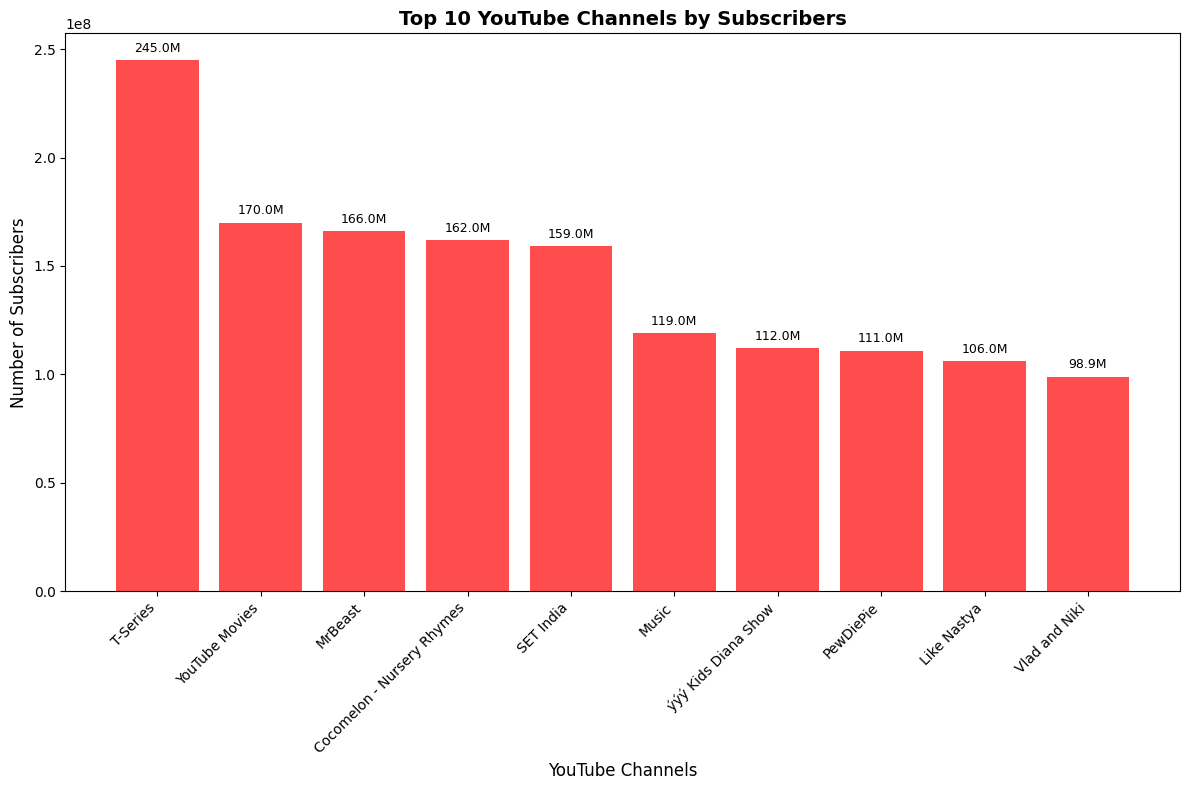

In [588]:
# Bar Plot

plt.figure(figsize=(12, 8))
plt.bar(range(len(top_10)), top_10['subscribers'], color='red', alpha=0.7)
plt.xticks(range(len(top_10)), top_10['Youtuber'], rotation=45, ha='right')
plt.xlabel('YouTube Channels', fontsize=12)
plt.ylabel('Number of Subscribers', fontsize=12)
plt.title('Top 10 YouTube Channels by Subscribers', fontsize=14, fontweight='bold')

# Add value labels on bars
for i, v in enumerate(top_10['subscribers']):
    plt.text(i, v + max(top_10['subscribers']) * 0.01, f'{v/1e6:.1f}M', 
             ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


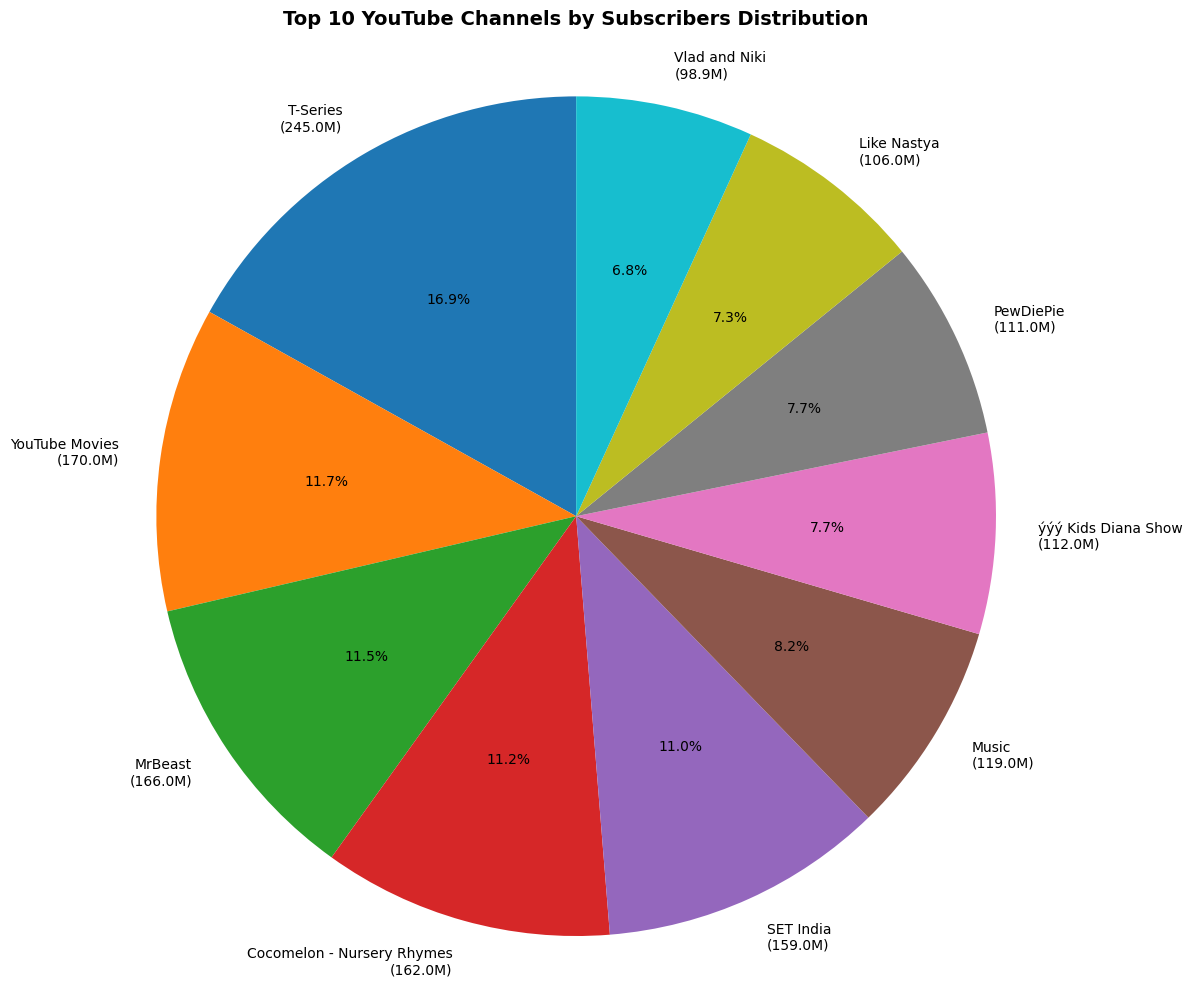

In [589]:
# Pie Plot
plt.figure(figsize=(12, 10))

# Create labels with subscriber counts
labels = [f'{name}\n({subs/1e6:.1f}M)' for name, subs in zip(top_10['Youtuber'], top_10['subscribers'])]

# Create pie chart
plt.pie(top_10['subscribers'], labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Top 10 YouTube Channels by Subscribers Distribution\n', fontsize=14, fontweight='bold')
plt.axis('equal')  
plt.tight_layout()
plt.show()


## 2.	Which category has the highest average number of subscribers?

In [590]:
top_category = (df.groupby('category')['subscribers'].mean().nlargest(10).reset_index())
top_category.columns = ['Category','Average Subscribers']
top_category['Average Subscribers'] = top_category['Average Subscribers'].round(0)

print("Top 10 Categories with average highest number of subscibers :")
print("=" * 61)
top_category


Top 10 Categories with average highest number of subscibers :


,Category,Average Subscribers
0,Shows,41615385.0
1,Trailers,39000000.0
2,Sports,32850000.0
3,Movies,32638095.0
4,Nonprofits & Activism,27750000.0
5,Education,27123913.0
6,Film & Animation,26873191.0
7,Music,25894231.0
8,News & Politics,23085185.0
9,Howto & Style,21504167.0


In [591]:
avg_subscribers_by_category = df.groupby('category')['subscribers'].mean().sort_values(ascending=False)

print("Category with highest average number of subscribers:")
print("=" * 52)
print(f"Category: {avg_subscribers_by_category.index[0]}")
print(f"Average Subscribers: {avg_subscribers_by_category.iloc[0]:,.0f}")


Category with highest average number of subscribers:
Category: Shows
Average Subscribers: 41,615,385


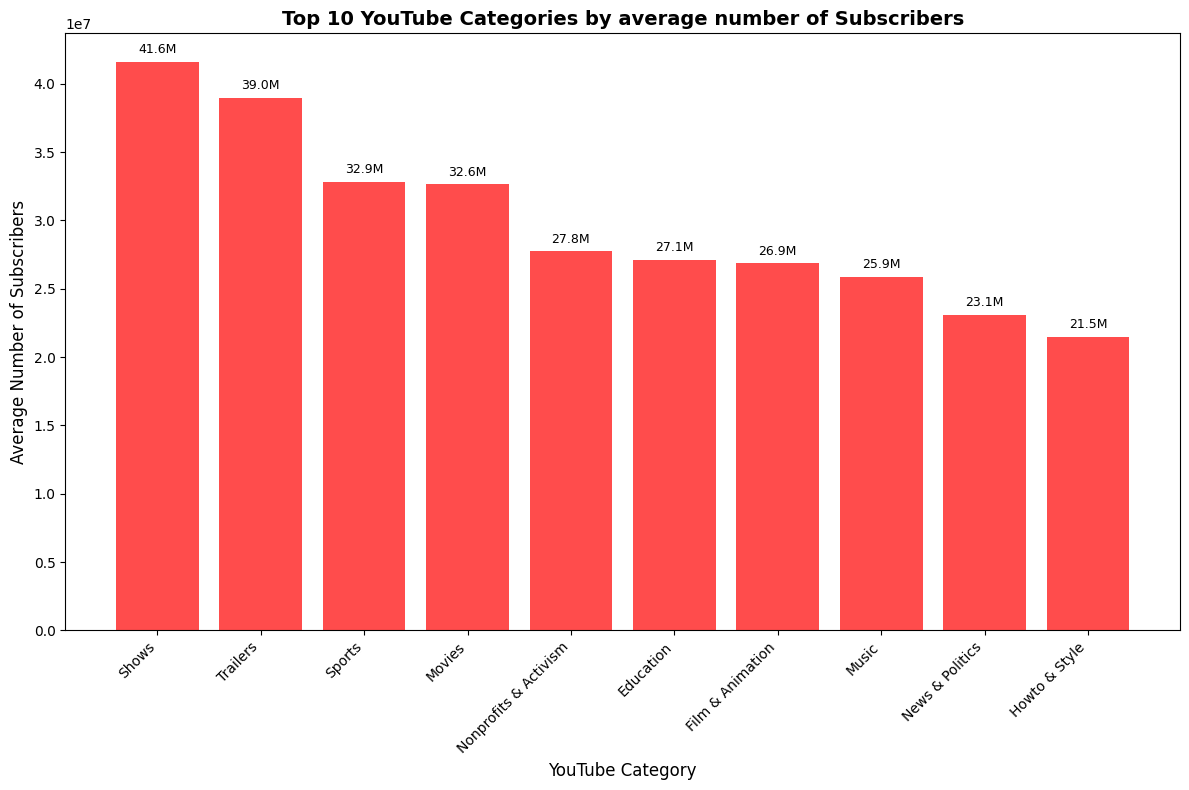

In [592]:
# Bar Plot

plt.figure(figsize=(12, 8))
plt.bar(range(len(top_category)), top_category['Average Subscribers'], color='red', alpha=0.7)
plt.xticks(range(len(top_category)), top_category['Category'], rotation=45, ha='right')
plt.xlabel('YouTube Category', fontsize=12)
plt.ylabel('Average Number of Subscribers', fontsize=12)
plt.title('Top 10 YouTube Categories by average number of Subscribers', fontsize=14, fontweight='bold')

# Add value labels on bars
for i, v in enumerate(top_category['Average Subscribers']):
    plt.text(i, v + max(top_category['Average Subscribers']) * 0.01, f'{v/1e6:.1f}M', 
             ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

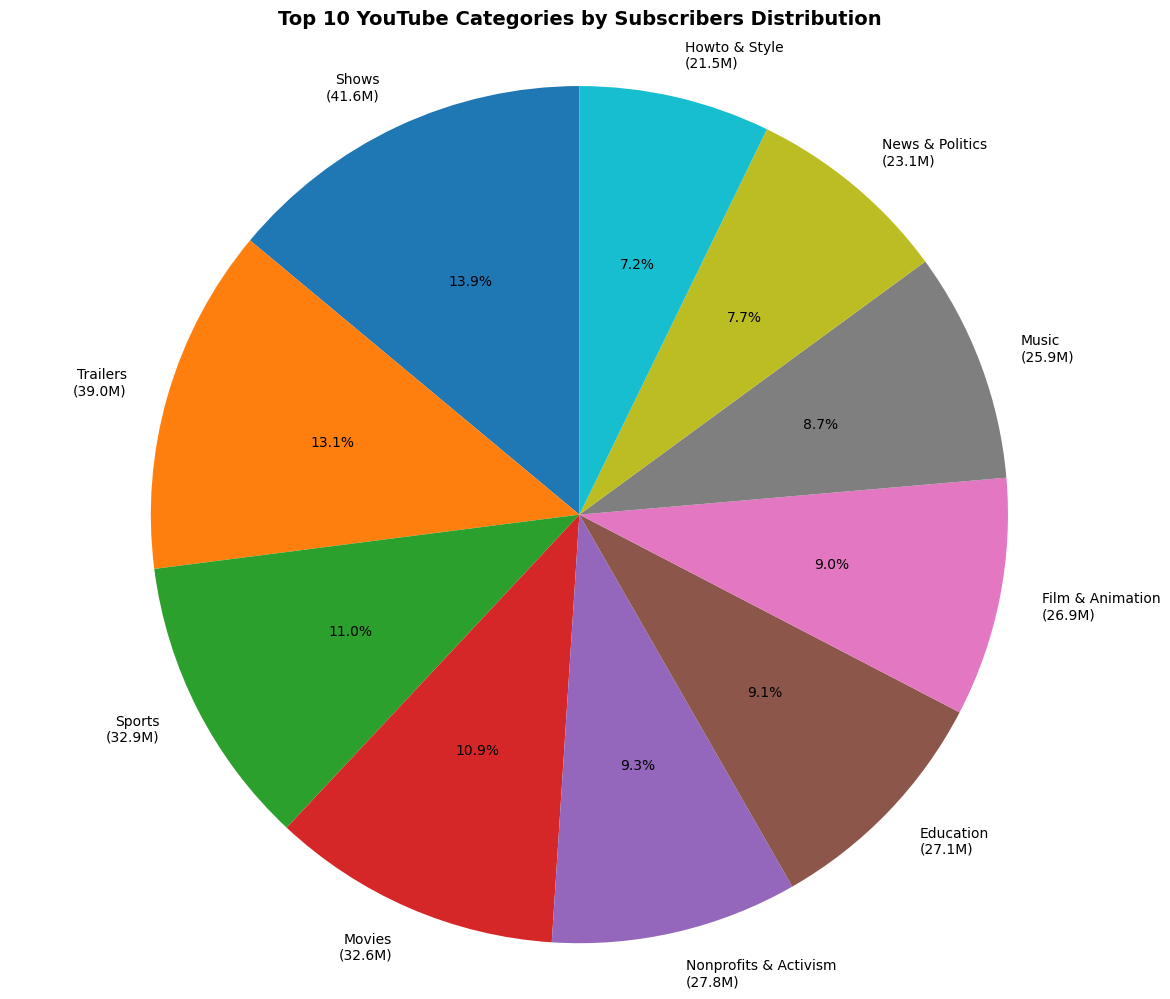

In [593]:
# Pie Plot
plt.figure(figsize=(12, 10))

# Create labels with subscriber counts
labels = [f'{name}\n({subs/1e6:.1f}M)' for name, subs in zip(top_category['Category'], top_category['Average Subscribers'])]

# Create pie chart
plt.pie(top_category['Average Subscribers'], labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Top 10 YouTube Categories by Subscribers Distribution\n', fontsize=14, fontweight='bold')
plt.axis('equal')  
plt.tight_layout()
plt.show()


## 3.	How many videos, on average, are uploaded by YouTube channels in each category?

In [594]:
avg_videos_by_category = df.groupby('category')['uploads'].mean().sort_values(ascending=False)

print("Average number of videos uploaded by YouTube channels in each category:")
print("=" * 70)
for category, avg_videos in avg_videos_by_category.items():
    print(f"{category:<25}: {avg_videos:,.1f} videos")


Average number of videos uploaded by YouTube channels in each category:
News & Politics          : 108,318.3 videos
Nonprofits & Activism    : 102,912.0 videos
Shows                    : 27,443.7 videos
Sports                   : 19,129.8 videos
Entertainment            : 11,914.7 videos
People & Blogs           : 9,256.8 videos
Trailers                 : 6,839.0 videos
Gaming                   : 3,850.4 videos
Pets & Animals           : 3,562.8 videos
Education                : 3,087.1 videos
Film & Animation         : 2,803.1 videos
Music                    : 2,291.8 videos
Science & Technology     : 2,114.1 videos
Autos & Vehicles         : 1,550.7 videos
Howto & Style            : 1,499.9 videos
Comedy                   : 1,202.6 videos
Travel & Events          : 766.0 videos
Movies                   : 561.1 videos


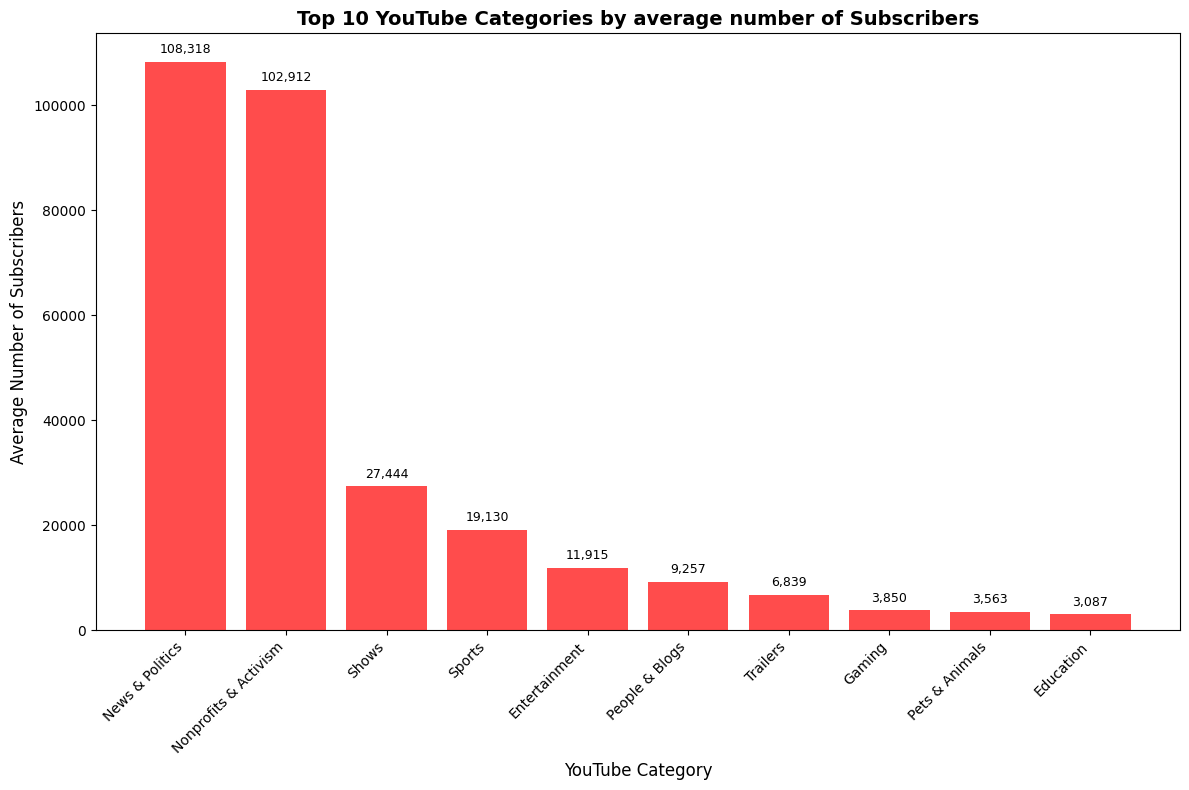

In [595]:
# Bar Plot
top_10_uploads = df.groupby('category')['uploads'].mean().nlargest(10)

plt.figure(figsize=(12, 8))
plt.bar(range(len(top_10_uploads)), top_10_uploads.values, color='red', alpha=0.7)
plt.xticks(range(len(top_10_uploads)), top_10_uploads.index, rotation=45, ha='right')
plt.xlabel('YouTube Category', fontsize=12)
plt.ylabel('Average Number of Subscribers', fontsize=12)
plt.title('Top 10 YouTube Categories by average number of Subscribers', fontsize=14, fontweight='bold')

# Add value labels on bars
for i, v in enumerate(top_10_uploads.values):plt.text(i, v + max(top_10_uploads.values) * 0.01, f'{v:,.0f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

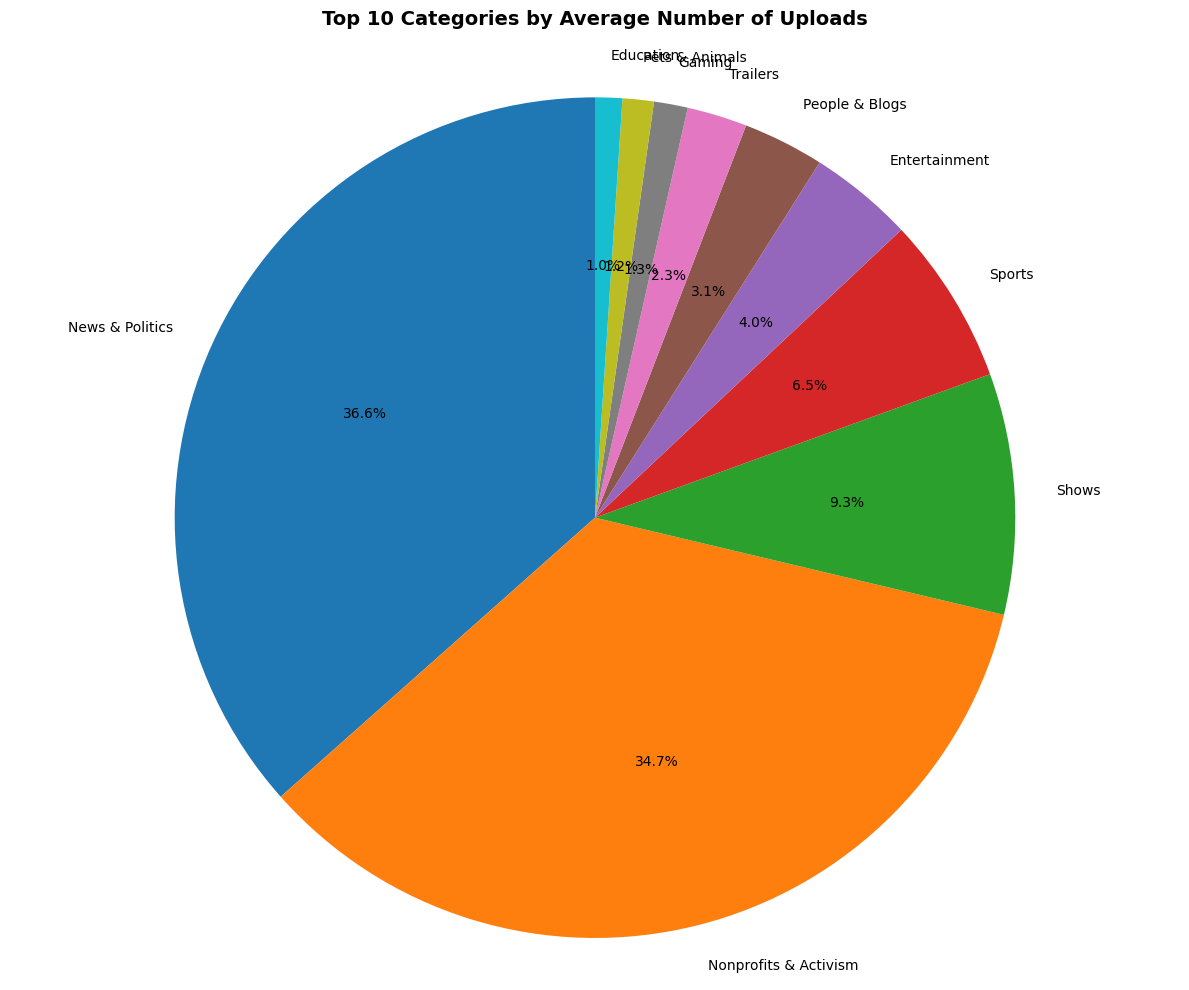

In [596]:
# Pie plot

plt.figure(figsize=(12, 10))
plt.pie(top_10_uploads.values, labels=top_10_uploads.index, autopct='%1.1f%%', startangle=90)
plt.title('Top 10 Categories by Average Number of Uploads\n', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()


In [597]:
# Overall summary
print("Summary of Upload Statistics:")
print("=" * 40)
print(f"Overall average uploads per channel: {df['uploads'].mean():,.1f}")
print(f"Overall median uploads per channel: {df['uploads'].median():,.1f}")
print(f"Total number of categories: {df['category'].nunique()}")

# Category with highest and lowest average uploads
avg_by_category = df.groupby('category')['uploads'].mean()
print(f"\nHighest average uploads:")
print(f"  Category: {avg_by_category.idxmax()}")
print(f"  Average: {avg_by_category.max():,.1f} videos")

print(f"\nLowest average uploads:")
print(f"  Category: {avg_by_category.idxmin()}")
print(f"  Average: {avg_by_category.min():,.1f} videos")


Summary of Upload Statistics:
Overall average uploads per channel: 9,168.3
Overall median uploads per channel: 726.5
Total number of categories: 18

Highest average uploads:
  Category: News & Politics
  Average: 108,318.3 videos

Lowest average uploads:
  Category: Movies
  Average: 561.1 videos


## 4.	What are the top 5 countries with the highest number of YouTube channels?

In [598]:
# Top 5 countries with highest number of YouTube channels

top_5_countries = df['Country'].value_counts().head(5)

print("Top 5 Countries with Highest Number of YouTube Channels:")
print("=" * 60)
for i, (country, count) in enumerate(top_5_countries.items(), 1):
    print(f"{i}. {country:<20}: {count:>3} channels")


Top 5 Countries with Highest Number of YouTube Channels:
1. United States       : 316 channels
2. India               : 169 channels
3. Brazil              :  62 channels
4. United Kingdom      :  47 channels
5. Mexico              :  43 channels


In [599]:
# More detailed analysis with percentages
country_counts = df['Country'].value_counts()
total_channels = len(df)

print("Top 5 Countries - Detailed Analysis:")
print("=" * 70)
print(f"{'Rank':<4} {'Country':<20} {'Channels':<10} {'Percentage':<12}")
print("-" * 70)

for i, (country, count) in enumerate(country_counts.head(5).items(), 1):
    percentage = (count / total_channels) * 100
    print(f"{i:<4} {country:<20} {count:<10} {percentage:<12.1f}%")

print(f"\nTotal channels analyzed: {total_channels}")


Top 5 Countries - Detailed Analysis:
Rank Country              Channels   Percentage  
----------------------------------------------------------------------
1    United States        316        31.4        %
2    India                169        16.8        %
3    Brazil               62         6.2         %
4    United Kingdom       47         4.7         %
5    Mexico               43         4.3         %

Total channels analyzed: 1006


In [600]:
# Create a DataFrame for better presentation
top_5_df = df['Country'].value_counts().head(5).reset_index()
top_5_df.columns = ['Country', 'Number_of_Channels']
top_5_df['Rank'] = range(1, 6)
top_5_df['Percentage'] = (top_5_df['Number_of_Channels'] / len(df) * 100).round(1)

# Reorder columns
top_5_df = top_5_df[['Rank', 'Country', 'Number_of_Channels', 'Percentage']]

print("Top 5 Countries with Highest Number of YouTube Channels:")
print("=" * 60)
top_5_df


Top 5 Countries with Highest Number of YouTube Channels:


,Rank,Country,Number_of_Channels,Percentage
0,1,United States,316,31.4
1,2,India,169,16.8
2,3,Brazil,62,6.2
3,4,United Kingdom,47,4.7
4,5,Mexico,43,4.3


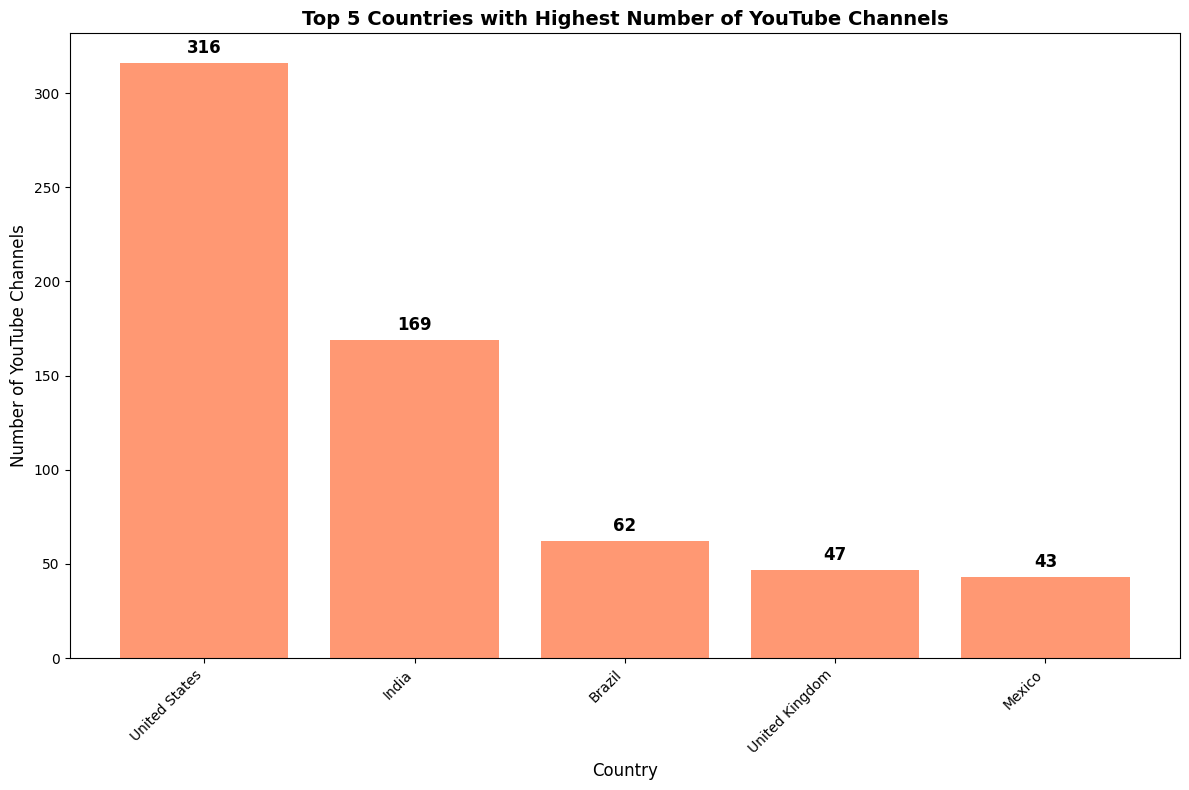

In [601]:
# Bar chart for top 5 countries

plt.figure(figsize=(12, 8))
plt.bar(range(len(top_5_countries)), top_5_countries.values, color='coral', alpha=0.8)
plt.xticks(range(len(top_5_countries)), top_5_countries.index, rotation=45, ha='right')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of YouTube Channels', fontsize=12)
plt.title('Top 5 Countries with Highest Number of YouTube Channels', fontsize=14, fontweight='bold')

# Add value labels on bars
for i, v in enumerate(top_5_countries.values):
    plt.text(i, v + max(top_5_countries.values) * 0.01, str(v), ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()


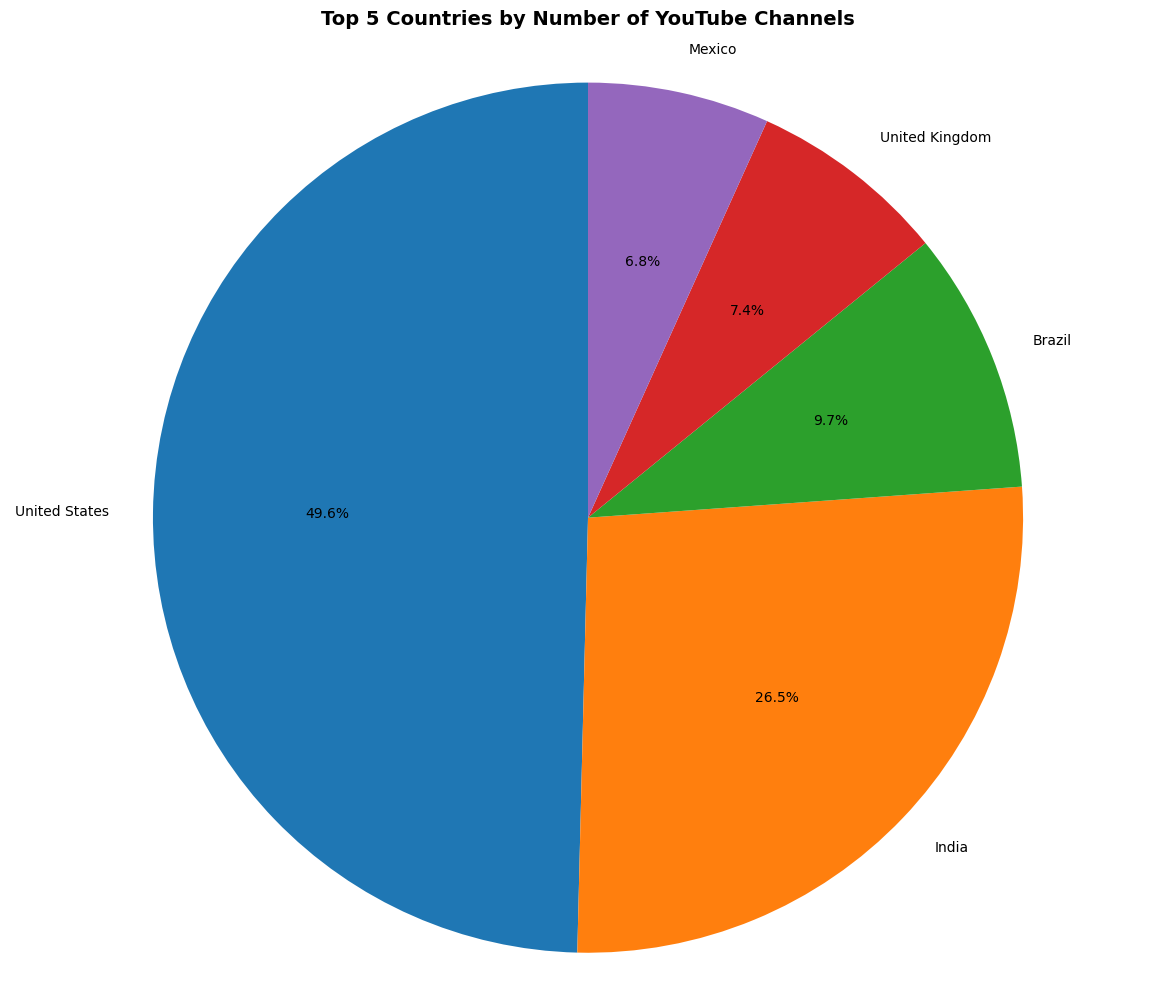

In [602]:
# Pie plot for top 5 countries

plt.figure(figsize=(12,10))
plt.pie(
    top_5_countries.values,
    labels=top_5_countries.index,
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Top 5 Countries by Number of YouTube Channels\n', fontsize=14, fontweight='bold')
plt.axis('equal')   
plt.tight_layout()
plt.show()


In [603]:
# Additional insights
country_stats = df.groupby('Country').agg({
    'subscribers': ['mean', 'sum'],
    'uploads': 'mean',
    'Country': 'count'
}).round(0)

country_stats.columns = ['Avg_Subscribers', 'Total_Subscribers', 'Avg_Uploads', 'Channel_Count']
top_5_detailed = country_stats.nlargest(5, 'Channel_Count')

print("Top 5 Countries - Comprehensive Analysis:")
print("=" * 80)
print(f"{'Country':<15} {'Channels':<8} {'Avg Subs':<12} {'Total Subs':<15} {'Avg Uploads':<12}")
print("-" * 80)
for country, row in top_5_detailed.iterrows():
    print(f"{country:<15} {row['Channel_Count']:>7.0f} {row['Avg_Subscribers']:>11,.0f} {row['Total_Subscribers']:>14,.0f} {row['Avg_Uploads']:>11.0f}")


Top 5 Countries - Comprehensive Analysis:
Country         Channels Avg Subs     Total Subs      Avg Uploads 
--------------------------------------------------------------------------------
United States       316  23,606,013  7,459,500,000        4357
India               169  24,490,178  4,138,840,000       21954
Brazil               62  19,706,452  1,221,800,000        2713
United Kingdom       47  22,280,851  1,047,200,000        1857
Mexico               43  18,972,093    815,800,000         898


In [604]:
# Summary statistics
total_countries = df['Country'].nunique()
top_5_total = df['Country'].value_counts().head(5).sum()
percentage_top_5 = (top_5_total / len(df)) * 100

print("Summary:")
print("=" * 40)
print(f"Total unique countries: {total_countries}")
print(f"Total channels in top 5 countries: {top_5_total}")
print(f"Percentage of channels in top 5 countries: {percentage_top_5:.1f}%")
print(f"Top country: {df['Country'].value_counts().index[0]}")
print(f"Channels in top country: {df['Country'].value_counts().iloc[0]}")


Summary:
Total unique countries: 50
Total channels in top 5 countries: 637
Percentage of channels in top 5 countries: 63.3%
Top country: United States
Channels in top country: 316


## 5.	What is the distribution of channel types across different categories?

In [ ]:
# 1. Contingency table: count of channel types per category
ct_counts = pd.crosstab(
    df['category'],
    df['channel_type']
).sort_index()

print("Counts of Channel Types by Category:")
print(ct_counts)

# 2. Proportions (percentage) within each category
ct_props = ct_counts.div(ct_counts.sum(axis=1), axis=0)

print("\nProportion of Channel Types by Category:")
print((ct_props * 100).round(1))


Counts of Channel Types by Category:
channel_type           Animals  Autos  Comedy  Education  Entertainment  Film  \
category                                                                        
Autos & Vehicles             0      2       0          0              1     0   
Comedy                       0      0      39          0             20     1   
Education                    0      0       0         36              3     2   
Entertainment                0      1       5          2            169    10   
Film & Animation             0      0       1          2             17    17   
Gaming                       0      1       1          2             22     3   
Howto & Style                0      0       0          1             11     1   
Movies                       0      0       0          1              4     6   
Music                        0      0       0          1             14     8   
News & Politics              0      0       0          0              3 

<Figure size 1200x800 with 0 Axes>

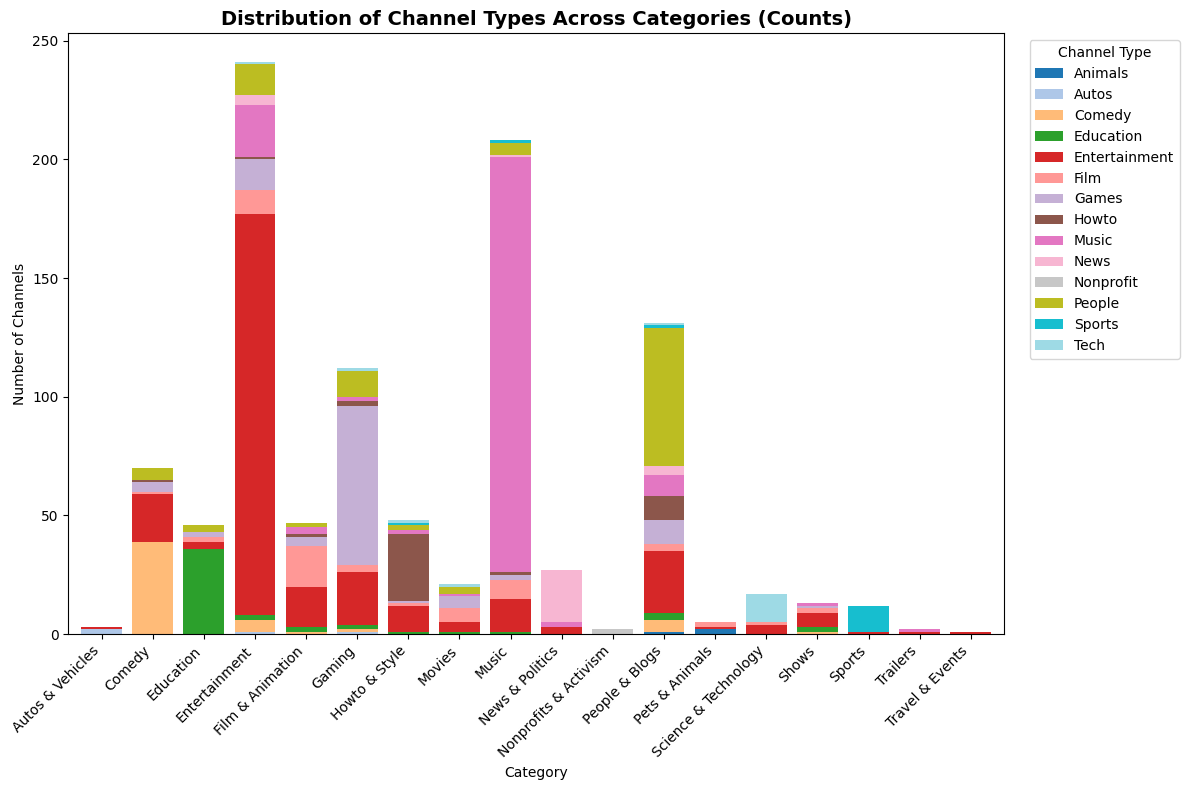

In [608]:
# 3a. Stacked‐bar of absolute counts
plt.figure(figsize=(12, 8))
ct_counts.plot(
    kind='bar',
    stacked=True,
    colormap='tab20',
    figsize=(12,8),
    width=0.8
)
plt.title("Distribution of Channel Types Across Categories (Counts)", fontsize=14, fontweight='bold')
plt.ylabel("Number of Channels")
plt.xlabel("Category")
plt.legend(title="Channel Type", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


<Figure size 1200x800 with 0 Axes>

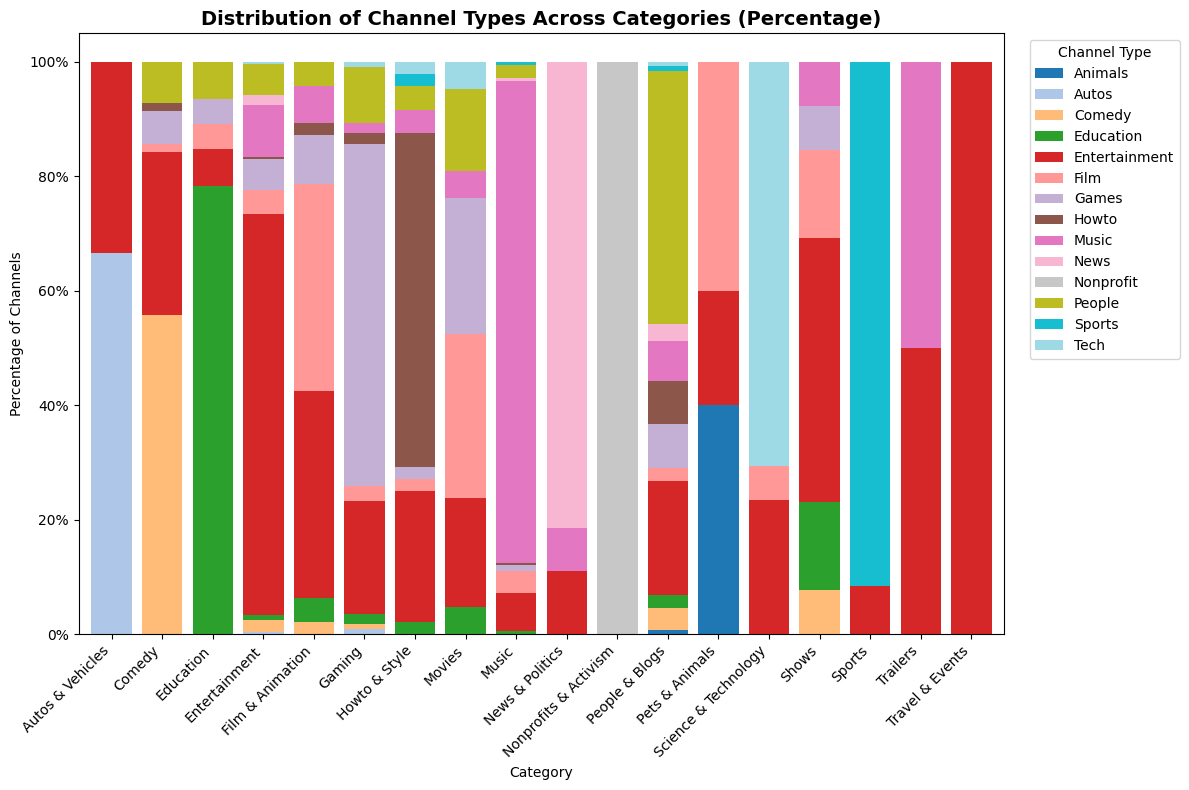

In [609]:
# 3b. Stacked‐bar of proportions (%)
plt.figure(figsize=(12, 8))
ct_props.plot(
    kind='bar',
    stacked=True,
    colormap='tab20',
    figsize=(12,8),
    width=0.8
)
plt.title("Distribution of Channel Types Across Categories (Percentage)", fontsize=14, fontweight='bold')
plt.ylabel("Percentage of Channels")
plt.xlabel("Category")
plt.legend(title="Channel Type", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.xticks(rotation=45, ha='right')
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.PercentFormatter(1.0))
plt.tight_layout()
plt.show()


## 6.	Is there a correlation between the number of subscribers and total video views for YouTube channels ?

In [612]:
df.columns

Index(['rank', 'Youtuber', 'subscribers', 'video views', 'category', 'Title',
       'uploads', 'Country of origin', 'Country', 'Abbreviation',
       'channel_type', 'video_views_rank', 'country_rank', 'channel_type_rank',
       'video_views_for_the_last_30_days', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'subscribers_for_last_30_days',
       'created_year', 'created_month', 'created_date',
       'Gross tertiary education enrollment (%)', 'Population',
       'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude'],
      dtype='object')

Data points used: 1006
Correlation Results:
 • Pearson r = 0.748  (p = 4.06e-181)
 • Spearman ρ = 0.555 (p = 2.01e-82)
 • Kendall τ = 0.403 (p = 4.94e-81)


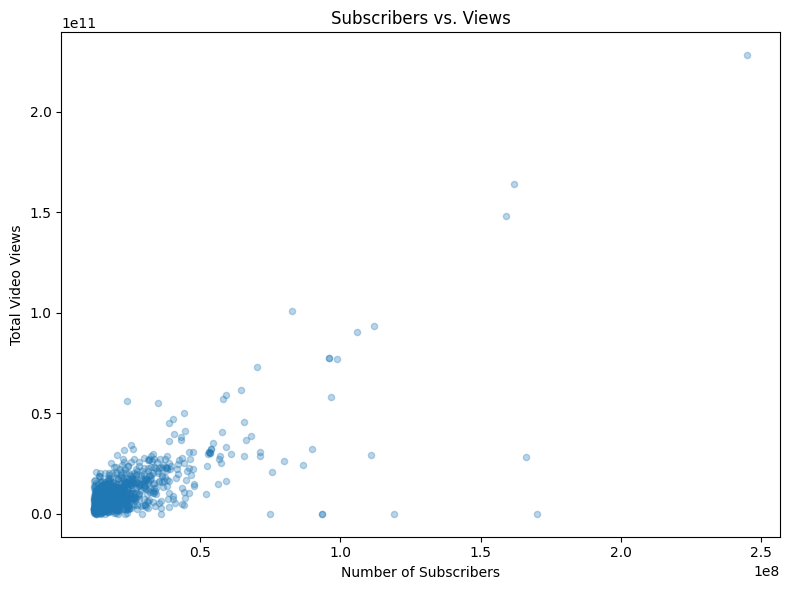

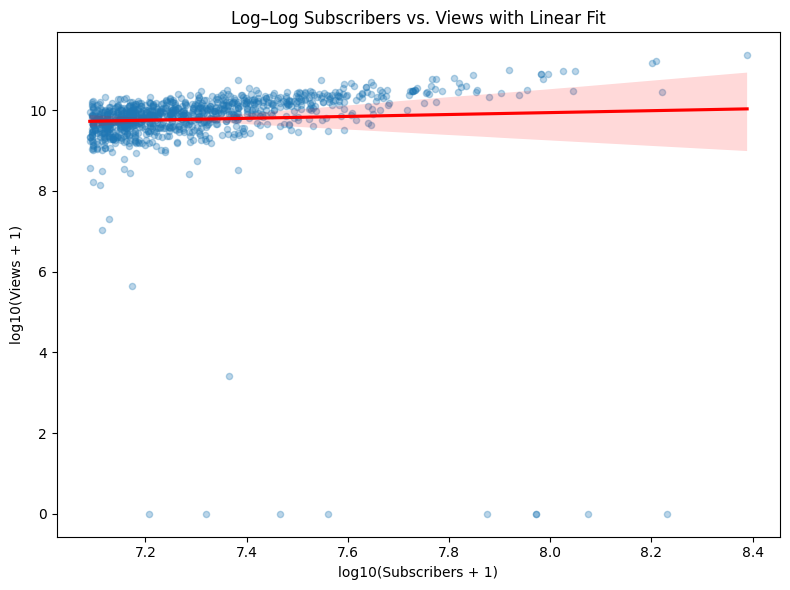

In [613]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr, kendalltau

# 1. Extract the two series (drop zero or missing)
sub = df_knn_imputed['subscribers']
views = df_knn_imputed['video views']

mask = sub.notna() & views.notna()
sub, views = sub[mask], views[mask]

print(f"Data points used: {len(sub)}")

# 2. Compute correlation coefficients
pearson_corr, pearson_p = pearsonr(sub, views)
spearman_corr, spearman_p = spearmanr(sub, views)
kendall_corr, kendall_p = kendalltau(sub, views)

print("Correlation Results:")
print(f" • Pearson r = {pearson_corr:.3f}  (p = {pearson_p:.3g})")
print(f" • Spearman ρ = {spearman_corr:.3f} (p = {spearman_p:.3g})")
print(f" • Kendall τ = {kendall_corr:.3f} (p = {kendall_p:.3g})")

# 3. Simple scatterplot
plt.figure(figsize=(8, 6))
plt.scatter(sub, views, alpha=0.3, s=20)
plt.title("Subscribers vs. Views")
plt.xlabel("Number of Subscribers")
plt.ylabel("Total Video Views")
plt.tight_layout()
plt.show()

# 4. Log–Log scatter + regression line (if distributions are highly skewed)
plt.figure(figsize=(8, 6))
sns.regplot(
    x=np.log10(sub + 1),
    y=np.log10(views + 1),
    scatter_kws={'alpha':0.3, 's':20},
    line_kws={'color':'red'}
)
plt.xlabel("log10(Subscribers + 1)")
plt.ylabel("log10(Views + 1)")
plt.title("Log–Log Subscribers vs. Views with Linear Fit")
plt.tight_layout()
plt.show()


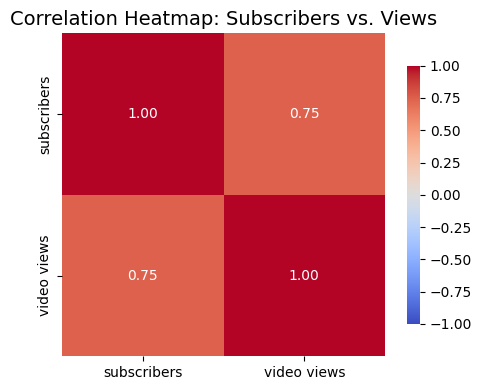

In [615]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Select the numeric columns you care about
numeric_cols = ['subscribers', 'video views']  # or df_knn_imputed.select_dtypes(include='number').columns.tolist()

# 2. Compute the correlation matrix
corr = df_knn_imputed[numeric_cols].corr()

# 3. Plot a simple 2×2 heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    vmin=-1,
    vmax=1,
    square=True,
    cbar_kws={'shrink': .8}
)
plt.title("Correlation Heatmap: Subscribers vs. Views", fontsize=14)
plt.tight_layout()
plt.show()


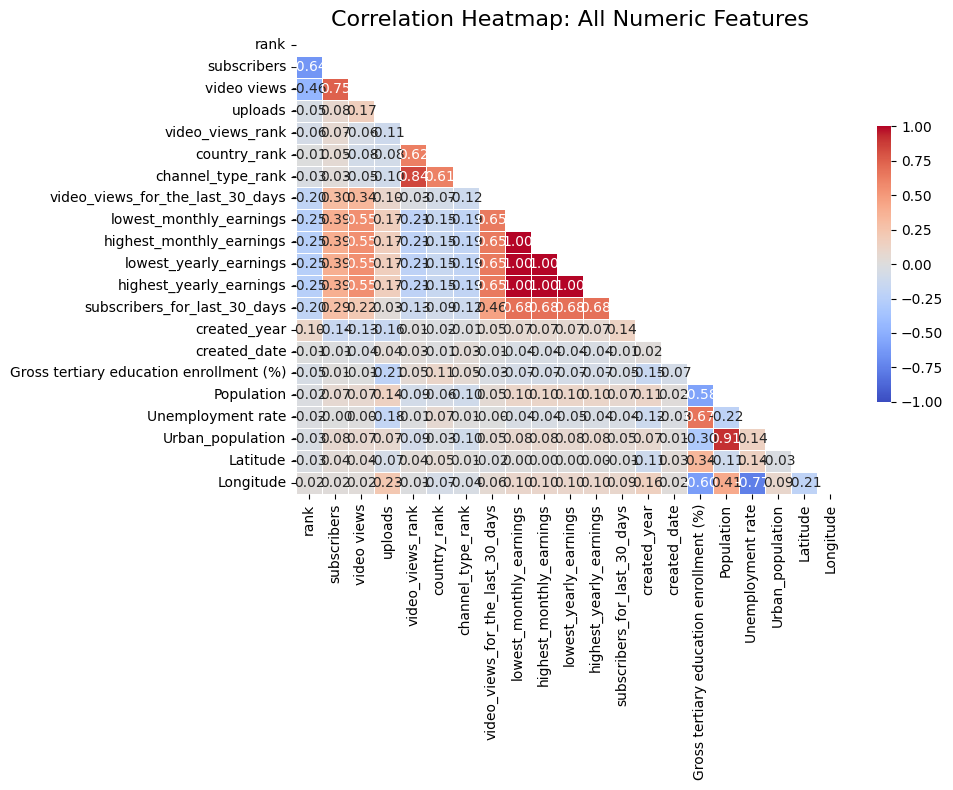

In [616]:
# pick up all numeric columns
numeric_cols = df_knn_imputed.select_dtypes(include=['int64','float64']).columns.tolist()

# correlation matrix
corr_all = df_knn_imputed[numeric_cols].corr()

# mask the upper triangle for readability
mask = np.triu(np.ones_like(corr_all, dtype=bool))

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_all,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    vmin=-1,
    vmax=1,
    linewidths=.5,
    cbar_kws={'shrink': .6}
)
plt.title("Correlation Heatmap: All Numeric Features", fontsize=16)
plt.tight_layout()
plt.show()
